## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the datasets

In [3]:
data = pd.read_csv(r"/Users/shikhargoyal/Documents/Shikhar/Ug/News Popularity Prediction/ml-lab-ii-c32/train.csv")
unseen = pd.read_csv(r"/Users/shikhargoyal/Documents/Shikhar/Ug/News Popularity Prediction/ml-lab-ii-c32/test.csv")
sample = pd.read_csv(r"/Users/shikhargoyal/Documents/Shikhar/Ug/News Popularity Prediction/ml-lab-ii-c32/sample.csv")
data_dict = pd.read_csv(r"/Users/shikhargoyal/Documents/Shikhar/Ug/News Popularity Prediction/ml-lab-ii-c32/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(29733, 61)
(9911, 60)
(9911, 2)
(61, 3)


In [4]:
# printing the data dictionary

data_dict

,Unnamed: 0,column,description
0,0,url,URL of the article (non-predictive)
1,1,timedelta,Days between the article publication and the d...
2,2,ntokenstitle,Number of words in the title
3,3,ntokenscontent,Number of words in the content
4,4,nuniquetokens,Rate of unique words in the content
5,5,nnonstop_words,Rate of non-stop words in the content
6,6,nnonstopuniquetokens,Rate of unique non-stop words in the content
7,7,num_hrefs,Number of links
8,8,numselfhrefs,Number of links to other articles published by...
9,9,num_imgs,Number of images


In [5]:
# checking the train dataset

data.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [6]:
# checking the train dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [7]:
# checking the statistical information about the training dataset

data.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28921.000000,25200.000000,24326.000000,29146.000000,29733.000000,29269.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28649.000000,29277.000000,29649.000000,29596.000000,28218.000000,29616.000000,29428.000000,29052.000000,28760.000000,29449.000000,27971.000000,29409.000000,28752.000000,28980.000000,28179.000000,29434.000000,28867.000000,29642.000000,28237.000000,27565.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,27487.000000,29382.000000,28898.000000,28845.000000,29146.000000,29140.000000,28495.000000,29288.000000,29584.000000,29546.000000,28951.000000,29021.000000,29605.000000,29466.000000,28934.000000,28276.000000,29733.000000
mean,14866.000000,10.403861,545.376652,0.554071,1.004238,0.694586,10.866706,3.285397,4.512785,1.263364,4.542961,7.217978,0.052669,0.175327,0.158275,0.058386,0.185047,0.213870,25.835945,1154.769238,311.128475,13653.678571,753460.486214,259904.903376,1121.525349,5658.801071,3141.089645,3949.202204,10461.340237,6426.079278,0.167884,0.186784,0.187516,0.184073,0.142966,0.061905,0.068102,0.129766,0.185391,0.140411,0.217210,0.223688,0.233266,0.443130,0.118950,0.039554,0.016590,0.681376,0.287926,0.353170,0.095636,0.755106,-0.259057,-0.521207,-0.106996,0.282072,0.071137,0.342417,0.155628,3439.840581
std,8583.322113,2.122101,471.476136,4.064623,6.039790,3.768884,11.384882,3.851624,8.335517,4.158469,0.855936,1.912259,0.223375,0.380253,0.365005,0.234476,0.388342,0.410043,69.316700,4008.595967,623.943555,57864.532067,213165.450292,135215.399335,1136.661797,6094.277266,1323.734009,18771.379524,41548.116050,23705.054711,0.373770,0.389745,0.390332,0.387550,0.350044,0.240988,0.251926,0.336052,0.264106,0.218503,0.283237,0.295239,0.288963,0.117417,0.096957,0.017454,0.010783,0.191247,0.156156,0.105223,0.071699,0.248494,0.128085,0.291191,0.095238,0.324263,0.265052,0.188547,0.226089,12212.123341
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,7433.000000,9.000000,245.000000,0.471376,1.000000,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,141.000000,0.000000,843300.000000,173296.428572,0.000000,3562.101631,2386.456742,636.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025060,0.025013,0.028571,0.028571,0.0285

## Handling Missing values

In [8]:
# Checking the null values

(100*(data.isnull().sum())/len(data.index))

id                                0.000000
url                               0.000000
n_tokens_title                    0.000000
n_tokens_content                  0.000000
n_unique_tokens                   0.000000
n_non_stop_words                  0.000000
n_non_stop_unique_tokens          0.000000
num_hrefs                         2.730972
num_self_hrefs                   15.245687
num_imgs                         18.185181
num_videos                        1.974237
average_token_length              0.000000
num_keywords                      1.560556
data_channel_is_lifestyle         0.000000
data_channel_is_entertainment     0.000000
data_channel_is_bus               0.000000
data_channel_is_socmed            0.000000
data_channel_is_tech              0.000000
data_channel_is_world             0.000000
kw_min_min                        3.645781
kw_max_min                        1.533649
kw_avg_min                        0.282514
kw_min_max                        0.460767
kw_max_max 

In [9]:
# filtering column names having null values
L1 = []
for i in data.columns:
    if (100*(data[i].isnull().sum())/len(data.index)):
        L1.append(i)

L1

['num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'num_keywords',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

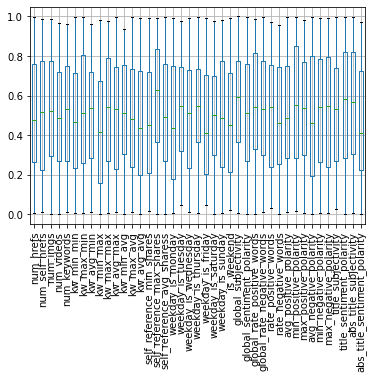

In [10]:
df = pd.DataFrame(data = np.random.random(size=(100,41)), columns = L1)
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

# Plots

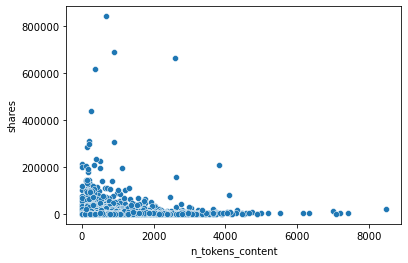

In [11]:
sns.scatterplot(x=data['n_tokens_content'], y = data['shares'])
plt.show()

### n_tokens_count upto 2000 then the shares are more

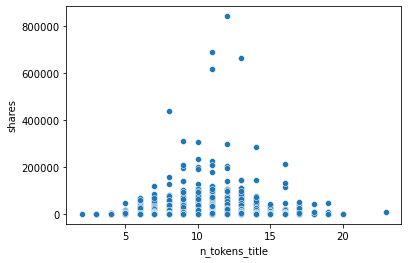

In [12]:
sns.scatterplot(x=data['n_tokens_title'], y = data['shares'])
plt.show()

### n_tokens_title whn between 10-15 then the number of shares are more

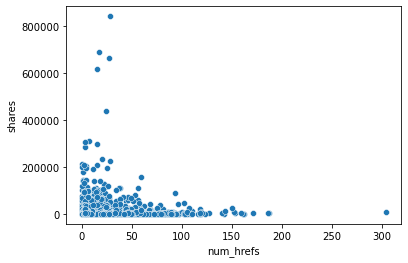

In [13]:
sns.scatterplot(x=data['num_hrefs'], y = data['shares'])
plt.show()

### When no. of links are upto 50 then shares are more

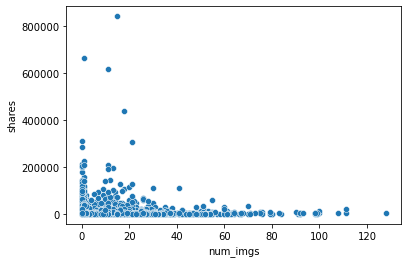

In [14]:
sns.scatterplot(x=data['num_imgs'], y = data['shares'])
plt.show()

### num_imgs upto 20 then number of shares are more

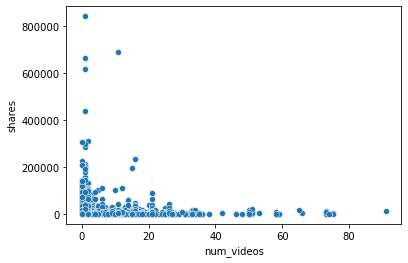

In [15]:
sns.scatterplot(x=data['num_videos'], y = data['shares'])
plt.show()

### num of videos less than 20 than the number of shares are more

In [16]:
# using MICE imputer for imputing the missing values

from fancyimpute import IterativeImputer

mice_imputer = IterativeImputer()
data[L1] = mice_imputer.fit_transform(data[L1])

In [17]:
# Checking the null values, no null values found

(100*(data.isnull().sum())/len(data.index))

id                               0.0
url                              0.0
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
k

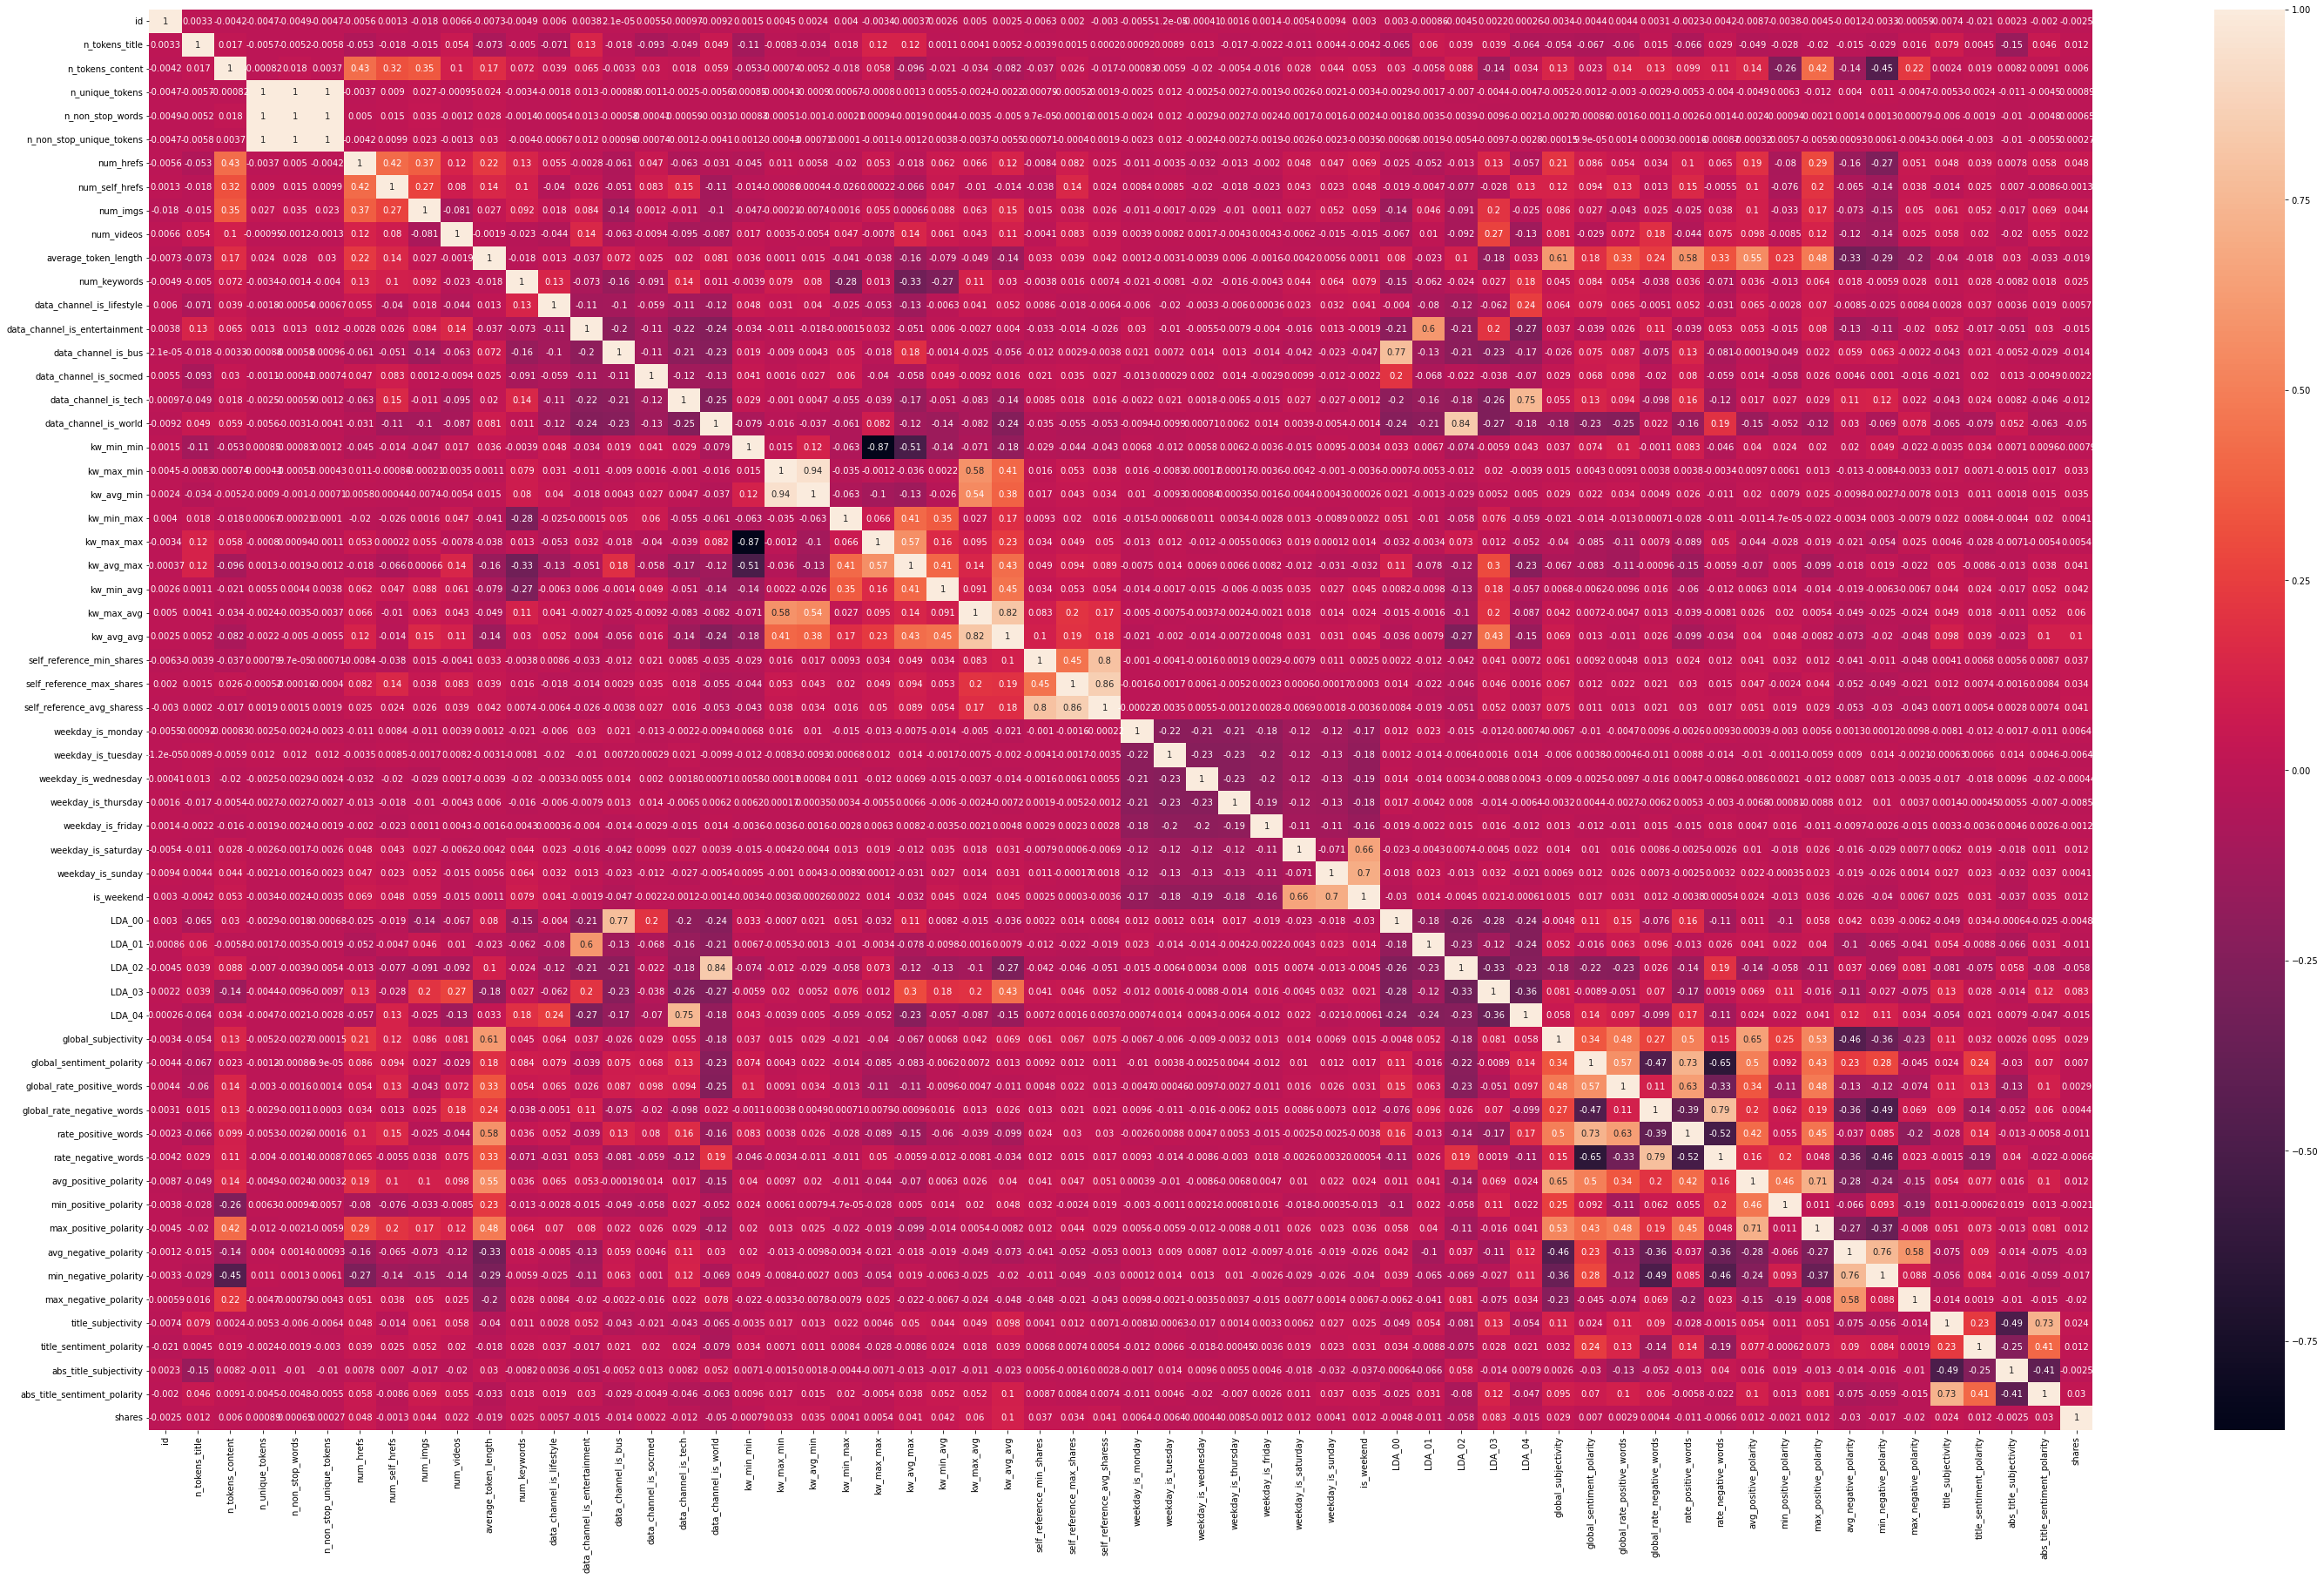

In [18]:
# plotting the correlation matrix

# plot the feature correlation heatmap
plt.figure(figsize=(50,30))
sns.heatmap(data.corr(),annot=True) 
plt.show()

## Handling outliers

In [19]:
# creating dataframe without URL and target columns

df2 = data.iloc[:,2:60]
df2.shape

(29733, 58)

<AxesSubplot:ylabel='Density'>

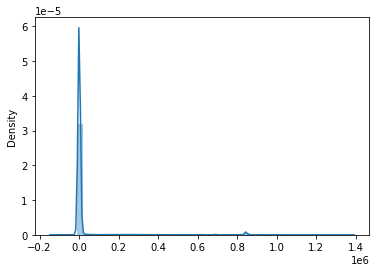

In [20]:
sns.distplot(df2)

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
scale = RobustScaler()
df2[:] = scale.fit_transform(df2)

<AxesSubplot:>

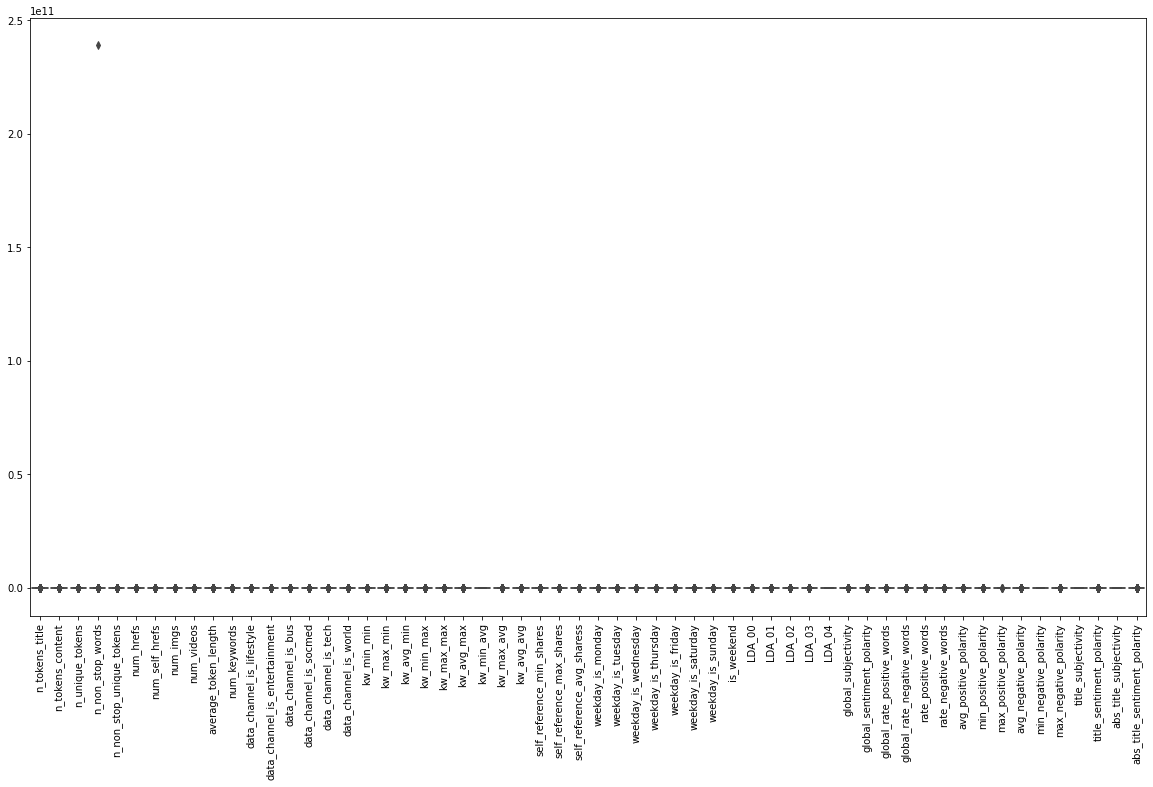

In [23]:
# we can see there are not outliers after doing robust scaler

plt.figure(figsize=(20,11))
plt.xticks(rotation=90)
sns.boxplot(data = df2)

## Train Test Split

In [24]:
y = data['shares'].values.ravel()

<AxesSubplot:ylabel='Density'>

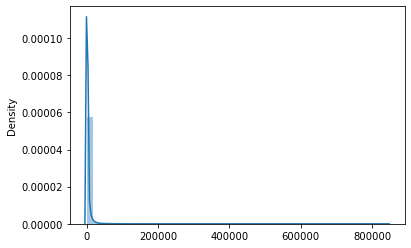

In [25]:
sns.distplot(y)

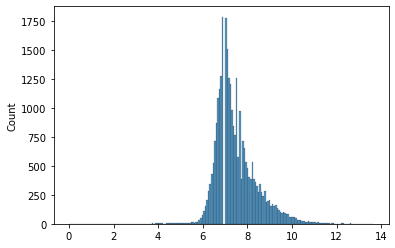

In [26]:
# doing the logarithmic transformation for y

y = np.log(y)
sns.histplot(y)
#sns.histplot(np.log(y))
plt.show()

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(df2, y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20813, 58) (20813,)
(8920, 58) (8920,)


In [28]:
X_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
4585,-0.333333,-0.509595,0.995217,-1.386630,0.912922,-0.101451,0.336222,0.000000,0.0,0.086672,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.368705,0.037582,-0.0670,-4.593761,0.015161,-0.083799,-0.039493,-0.227274,0.533204,0.183099,0.248874,0.0,1.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.490915,2.673678,-0.021831,-1.914190e-02,0.453056,0.547317,0.684311,-0.698315,-0.285632,-0.214286,0.268589,1.653395,1.944993,0.500,0.992727,0.93750,0.000000,-0.288889,0.000000,0.000000,-0.066667
13413,-0.333333,1.537313,-0.861228,0.579371,-0.566235,0.000000,-0.330445,0.000000,1.0,0.407129,-0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.487410,-0.644343,-0.1750,0.000000,0.445957,-0.504743,-0.368794,-0.796309,-0.222976,-0.304225,-0.346054,0.0,0.0,-1.907363e-13,1.0,0.0,0.0,0.0,0.0,2.797047,1.647447,-0.000009,-7.974924e-08,-0.002086,-0.475565,0.318021,0.849792,-0.389586,0.673160,-0.625253,-0.256599,-1.333333,0.500,0.025944,-1.25000,0.000000,0.219444,0.263298,-0.762500,0.083333
9073,1.333333,-0.441365,0.735811,-0.903974,0.412083,-0.405804,-0.330445,1.914745,1.0,-0.460273,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.345324,-0.111094,0.0750,0.000000,0.598834,0.189766,1.231570,1.293053,2.472128,8.676056,7.869163,0.0,0.0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.051467,1.462090,-0.058214,1.944302e+00,-0.050215,0.662891,1.570071,0.669328,-1.262796,1.452381,-1.410090,0.582648,-0.333333,0.250,1.785734,1.25000,1.333333,0.461111,3.861702,-1.125000,2.133333
28754,0.333333,2.006397,-0.847136,0.638181,-0.554453,0.507255,1.002888,0.000000,15.0,-0.671609,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.275180,-0.390812,2.6125,0.000000,-0.217226,0.830490,-0.220014,0.359218,1.454193,0.183099,0.474046,0.0,0.0,0.000000e+00,1.0,0.0,0.0,0.0,0.0,2.137702,0.013300,-0.021547,1.037136e+00,-0.020047,-0.155214,0.170234,0.351306,-0.410315,0.543290,-0.494447,-0.424400,-1.333333,-0.125,-0.000879,-0.19246,0.666667,0.620202,0.957447,-1.363636,0.478788
21620,0.333333,-0.392324,0.181747,-0.833218,0.128312,-0.304353,0.002888,0.000000,0.0,0.795951,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,43.6,0.609712,1.170567,-0.1750,-23.776995,-1.447123,-0.504743,-0.681548,-0.886380,0.436258,-0.070423,0.011851,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.0,1.0,0.548873,-0.034145,1.052756,1.115488e+00,-0.032976,-1.109247,0.259980,-0.556560,-0.894716,0.738095,-0.690656,0.863499,0.000000,0.500,-3.500979,-0.62500,-8.666667,-0.288889,0.000000,0.000000,-0.066667


## Feature Engineering and Selection of important variables

In [29]:
# Importing RFE and LinearRegression


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr, 15)             #selected top 15 features
rfe = rfe.fit(X_train, Y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', False, 18),
 ('n_tokens_content', False, 22),
 ('n_unique_tokens', False, 21),
 ('n_non_stop_words', False, 44),
 ('n_non_stop_unique_tokens', False, 16),
 ('num_hrefs', False, 9),
 ('num_self_hrefs', False, 23),
 ('num_imgs', False, 29),
 ('num_videos', False, 42),
 ('average_token_length', False, 14),
 ('num_keywords', False, 19),
 ('data_channel_is_lifestyle', False, 3),
 ('data_channel_is_entertainment', True, 1),
 ('data_channel_is_bus', True, 1),
 ('data_channel_is_socmed', False, 8),
 ('data_channel_is_tech', False, 17),
 ('data_channel_is_world', True, 1),
 ('kw_min_min', False, 37),
 ('kw_max_min', False, 36),
 ('kw_avg_min', False, 34),
 ('kw_min_max', False, 38),
 ('kw_max_max', False, 43),
 ('kw_avg_max', False, 5),
 ('kw_min_avg', False, 7),
 ('kw_max_avg', False, 6),
 ('kw_avg_avg', False, 4),
 ('self_reference_min_shares', False, 40),
 ('self_reference_max_shares', False, 41),
 ('self_reference_avg_sharess', False, 32),
 ('weekday_is_monday', True, 1)

In [31]:
#Important columns given by RFE


cols3 = X_train.columns[rfe.support_]
cols3

Index(['data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_02', 'LDA_03', 'LDA_04'], dtype='object')

In [32]:
# creating new df with important columns


X_train_rfe = X_train[cols3]
X_train_rfe.head()

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_02,LDA_03,LDA_04
4585,0.0,1.0,0.0,0.0,1.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.490915,-0.021831,-1.914190e-02,0.453056
13413,0.0,1.0,0.0,0.0,0.0,-1.907363e-13,1.0,0.0,0.0,0.0,0.0,2.797047,-0.000009,-7.974924e-08,-0.002086
9073,1.0,0.0,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.051467,-0.058214,1.944302e+00,-0.050215
28754,1.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,0.0,0.0,0.0,0.0,2.137702,-0.021547,1.037136e+00,-0.020047
21620,0.0,0.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.0,1.0,0.548873,1.052756,1.115488e+00,-0.032976


In [33]:
# creating new df with important columns


X_test_rfe = X_test[cols3]
X_test_rfe.head()

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_02,LDA_03,LDA_04
17455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2.043071,1.254300,-0.018693,-0.020125
25193,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00,0.030562,1.971608,0.000018,0.533147
13154,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,-0.000255,2.706274,-0.019154,-0.020129
6712,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.942890e-13,1.170560,-0.049018,-0.043092,1.615775
29548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2.801993,-0.000006,0.000789,-0.001854


In [34]:
# Applying PCA

pca=PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[ 1.19145458e+00, -1.95224066e-02,  3.47062969e-01, ...,
        -2.74285486e-01,  5.87754072e-05, -5.89778256e-14],
       [ 2.42371206e+00,  1.78358161e-01, -1.65802583e-01, ...,
        -1.46812286e-01, -7.81569325e-06, -3.78401016e-14],
       [-7.25569111e-01, -1.53185420e+00, -9.29099712e-01, ...,
        -1.33145252e-01, -1.37095015e-04, -6.63783865e-14],
       ...,
       [-5.95271085e-01, -3.26915170e-01,  1.97795887e+00, ...,
        -7.45808543e-03, -2.10087525e-04,  9.98016656e-14],
       [-1.02957841e+00,  1.31357693e+00,  1.64920561e-01, ...,
        -2.66388802e-01, -9.10070839e-05,  5.73878757e-14],
       [-3.41294689e-01,  1.75844947e+00, -7.24498909e-01, ...,
        -7.13978318e-02, -2.64893471e-04, -9.44205445e-14]])

In [35]:
# PCA components

components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X_train_rfe.columns})
components

,PC1,PC2,Feature
0,-0.045277,-0.112058,data_channel_is_entertainment
1,0.218710,0.031288,data_channel_is_bus
2,-0.110989,0.282089,data_channel_is_world
3,0.003819,0.000426,weekday_is_monday
4,0.000491,0.000658,weekday_is_tuesday
5,0.003029,0.002249,weekday_is_wednesday
6,0.006681,0.003648,weekday_is_thursday
7,-0.006186,-0.000239,weekday_is_friday
8,-0.003403,-0.001635,weekday_is_saturday
9,-0.004457,-0.005158,weekday_is_sunday


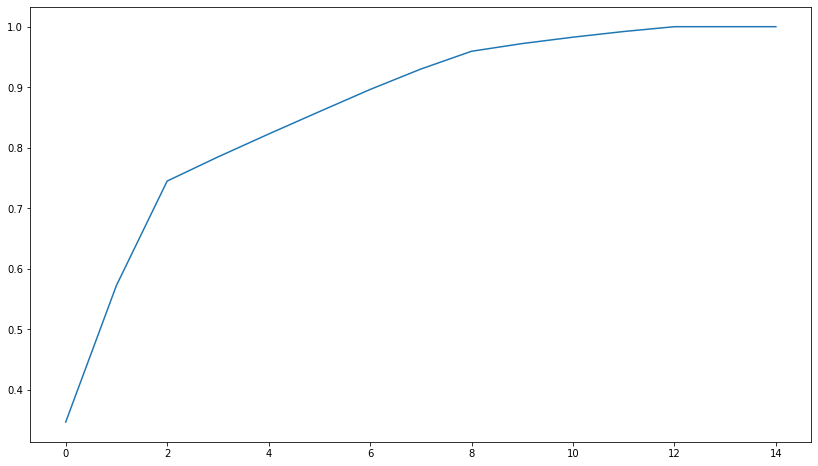

In [36]:
#lets draw screeplot in between cumulative variance and number of components

fig = plt.figure(figsize = (14,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [37]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'Feature':colnames})


In [38]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_test_rfe.columns)
pca_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})



In [39]:
#Creating a new df on 8 features for train data

X_train_pca = X_train_rfe[pca_df.Feature[:8]]
X_train_pca.head()

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday
4585,0.0,1.0,0.0,0.0,1.0,0.000000e+00,0.0,0.0
13413,0.0,1.0,0.0,0.0,0.0,-1.907363e-13,1.0,0.0
9073,1.0,0.0,0.0,0.0,0.0,1.000000e+00,0.0,0.0
28754,1.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,0.0
21620,0.0,0.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0


In [40]:
#Creating a new df on 8 features for test data

X_test_pca = X_test_rfe[pca_df1.Feature[:8]]
X_test_pca.head()

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday
17455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25193,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13154,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6712,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
from sklearn.decomposition import IncrementalPCA
pca_incremental = IncrementalPCA(n_components=8)
df_train_pca = pca_incremental.fit_transform(X_train_pca)

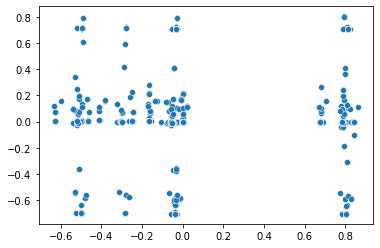

In [42]:
#Plotting first 2
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()

In [43]:
df_test_pca = pca_incremental.transform(X_test_pca)
df_test_pca.shape

(8920, 8)

## Linear regression

In [44]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [45]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, Y_train)
# predict the testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0638
r2:  0.0638
MAE:  0.6779
MSE:  0.8229
RMSE:  0.9072

Test metrics
explained_variance:  0.058
r2:  0.0576
MAE:  0.6645
MSE:  0.7938
RMSE:  0.891


# Ridge Regression

In [46]:
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.6780942444351294


In [48]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, Y_train)
print(ridge.coef_)

[-0.17250815 -0.0080363   0.00115927 -0.02682175  0.11315394  0.12301727
 -0.67165312 -0.63085395]


In [49]:
# predict it now...
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0638
r2:  0.0638
MAE:  0.6779
MSE:  0.8229
RMSE:  0.9072

Test metrics
explained_variance:  0.058
r2:  0.0576
MAE:  0.6645
MSE:  0.7938
RMSE:  0.891


## Lasso Regresssion

In [50]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.6781274412468117


In [52]:
alpha =0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_train_pca, Y_train)
print(lasso.coef_)

[-1.72000970e-01 -7.50194442e-03  6.19241690e-04 -2.62449623e-02
  1.12548887e-01  1.22347014e-01 -6.70428269e-01 -6.26376962e-01]


In [53]:
# predict it now...
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0638
r2:  0.0638
MAE:  0.678
MSE:  0.8229
RMSE:  0.9072

Test metrics
explained_variance:  0.058
r2:  0.0576
MAE:  0.6646
MSE:  0.7938
RMSE:  0.8909


## Creating submission file

In [54]:
sample.head()

,id,shares
0,29733,20000
1,29734,20000
2,29735,20000
3,29736,20000
4,29737,20000


In [55]:
unseen3 = unseen.copy()

In [56]:
submission_data3 = unseen3.set_index('id')[X_train_pca.columns]
submission_data3.shape

(9911, 8)

In [57]:
# filtering column names having null values
L2 = []
for i in submission_data3.columns:
    if (100*(submission_data3[i].isnull().sum())/len(submission_data3.index)):
        L2.append(i)

L2

['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday']

In [58]:
# using MICE imputer for imputing the missing values

from fancyimpute import IterativeImputer

mice_imputer = IterativeImputer()
submission_data3[L2] = mice_imputer.fit_transform(submission_data3[L2])

In [59]:
scale = StandardScaler()
submission_data3[:] = scale.fit_transform(submission_data3)

In [60]:
submission_data3 = pca_incremental.transform(submission_data3)
submission_data3.shape

(9911, 8)

In [61]:
unseen3['Shares'] = lasso.predict(submission_data3)
output = unseen3[['id','Shares']]
output.head()

,id,Shares
0,29733,7.222898
1,29734,8.382009
2,29735,7.351625
3,29736,7.379729
4,29737,7.950898


In [62]:
output.to_csv('submission_pca_ridge_lasso_lr8.csv',index=False)

## Final Observations

1.) n_tokens_count upto 2000 then the shares are more

2.) n_tokens_title whn between 10-15 then the number of shares are more

3.) When no. of links are upto 50 then shares are more

4.) num_imgs upto 20 then number of shares are more

5.) num of videos less than 20 than the number of shares are more

6.) Fromt he correlation amtrix we can see that weekday_is_saturday has strong correlation with shares which means that on saturday the number of shares are more

## *************************END***************************